In [2]:
import numpy  as np
import pandas as pd

from matplotlib import pyplot as plt

from common import hallmark as hm
from common import viz

In [3]:
def getdist(path, dist):
    df = pd.read_csv(path, sep='\t')
    return df[dist].values

pf = hm.ParaFrame('cache/SPO2023/summ_SgrA/{NGC}_a{aspin:g}_i{inc:g}_{freq}.tsv')

for k in set(pf.keys()) - {'path'}:
    globals()[k] = np.unique(pf[k])
    print(k, globals()[k][:16])

freq = ['86.e9', '230.e9', '345.e9']

inc [30.]
freq ['230.e9']
NGC ['SgrA']
aspin [-0.94 -0.5   0.    0.5   0.94]


In [18]:
df = pd.read_csv(pf(aspin=0).path.iloc[0], sep='\t')
df.columns
df['Ftot']

/Users/caritsang/Desktop/Project/2024SURE/proj/postprocessing/2017_sgra_paper5/common/hallmark.py:28: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  mask |= self[k] == v


0      0.357648
1      0.338212
2      0.340663
3      0.346060
4      0.336118
         ...   
995    0.519096
996    0.512821
997    0.523146
998    0.502777
999    0.482147
Name: Ftot, Length: 1000, dtype: float64

In [7]:
def getdist(path, dist):
    df = pd.read_csv(path, sep='\t')
    return df[dist].values

def plotdist(ax, pf, key, ylim=None, yscale=None):
    sel   = pf.sort_values('inc')
    print(sel)
    dists = [getdist(p, key) for p in sel.path]
    plots = ax.violinplot(dists, widths=20, showmedians=True, showextrema=False, positions=[50, 80])
    for pc, color in zip(plots['bodies'], ['blue', 'green']):
        pc.set_facecolor(color)
    if ylim is not None:
        ax.set_ylim(ylim)
        
    if yscale is not None:
        ax.set_yscale(yscale)

def vizrow(plot, ylim=None, ylabel=None):
    fig, axes = plt.subplots(1,5, figsize=(11,4), sharex=True, sharey=True)
    plt.subplots_adjust(wspace=0, hspace=0)

    for a, ax in enumerate(axes):
        sel = pf(aspin=aspin[a])
        ax = axes[a]
        ax.set_title(aspin[a])
        plot(ax, sel)

        if ylim != None:
            ax.set_ylim(ylim[0], ylim[1])

        ax.tick_params(
            axis='both',
            direction='in',
            top=True,
            right=True,
            color='w',
        )
        for spine in ax.spines.values():
            spine.set_edgecolor('w')

    
    if ylabel != None:
        axes[0].set_ylabel(ylabel)

Ftot 86.e9 0
                                                path   NGC  aspin   inc  \
3  cache/SPO2023/summ_SgrA/SgrA_a-0.94_i30_230.e9...  SgrA  -0.94  30.0   

     freq  
3  230.e9  


/Users/caritsang/Desktop/Project/2024SURE/proj/postprocessing/2017_sgra_paper5/common/hallmark.py:28: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  mask |= self[k] == v


ValueError: List of violinplot statistics and `positions` values must have the same length

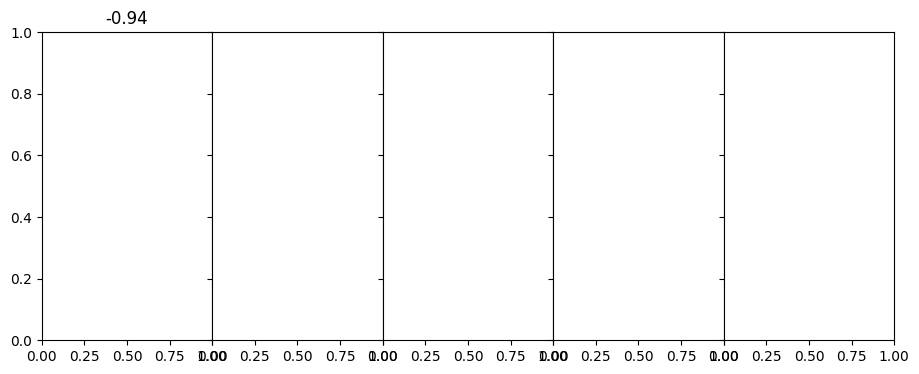

In [8]:
settings = {
    'Ftot':{
        '86.e9' :([0,0.2],        None,  r'Flux $F_\nu$ [Jy]'),
        '230.e9':([0.06,0.3],        None,  r'Flux $F_\nu$ [Jy]'),
        '345.e9'   :([0, 0.5], None, r'Flux $F_\nu$ [Jy]'),
    },
    'major_FWHM':{
        '86.e9' :([10,35], None, r'Size [$\mu$as]'),
        '230.e9':([5,20], None, r'Size [$\mu$as]'),
        '345.e9'   :([5,16],  None, r'Size [$\mu$as]'),
    },
    'minor_FWHM':{
        '86.e9' :([5,25], None, r'Size [$\mu$as]'),
        '230.e9':([5,20], None, r'Size [$\mu$as]'),
        '345.e9'   :([0,15],  None, r'Size [$\mu$as]'),
    },
    'PA':{
        '86.e9' :([-90,90], None, r'PA [$^\circ$]'),
        '230.e9':([-90,90], None, r'PA [$^\circ$]'),
        '345.e9'   :([-90,90], None, r'PA [$^\circ$]'),
    },
    'alpha0':{
        '86.e9' :([-3,3], None, r'Offset [$\mu$as]'),
        '230.e9':([-3,3], None, r'Offset [$\mu$as]'),
        '345.e9'   :([-3,3], None, r'Offset [$\mu$as]'),
    },
    'beta0':{
        '86.e9' :([-6,6], None, r'Offset [$\mu$as]'),
        '230.e9':([-3,3], None, r'Offset [$\mu$as]'),
        '345.e9'   :([-3,3], None, r'Offset [$\mu$as]'),
    },
    
}
if True:
    for dist, settings2 in settings.items():
        for freq, (ylim, yscale, ylabel) in settings2.items():
            plot = lambda ax, pf: plotdist(ax, pf, dist, ylim, yscale)
            if True:
                sel = pf(freq=freq)
                print(dist, freq, len(sel))
                fig = viz.grid(
                    sel, plot, aspin=aspin, NGC=NGC,
                    figsize=(15,12), title=r'{} {}'.format(dist, freq),
                    xtitle=r'$a_\mathrm{{spin}}={}$',     ytitle=r'$Obj={}$',
                    xlabel=r'Inclination $i$ [$^\circ$]', ylabel=ylabel,
                    #fout='output/plot/dist/{}_{}'.format(dist, freq),
                )
                plt.show()
            

In [ ]:
settings2 = {
    'tauI':{
        '86.e9' :([0,2700],        None,  ''), # Ignore NGC4261
        '230.e9':([0, 200],        None,  ''), # Ignore NGC4261
        '345.e9'   :([0, 150], None, ''),      # Ignore NGC4261
    },
    'tauF':{
        '86.e9' :([0, 2e4], None, ''),
        '230.e9':([0,4e4], None, ''),
        '345.e9'   :([0, 2e4],  None, ''),
    },
    'mavg':{
        '86.e9' :([0, 0.1], None, ''),
        '230.e9':([0, 0.1], None, ''),
        '345.e9':([0, 0.1],  None, ''),
    },
    'vavg':{
        '86.e9' :([-0.1, 0.1], None, ''),
        '230.e9':([-0.1, 0.1], None, ''),
        '345.e9':([-0.1, 0.1],  None, ''),
    }
}

if True:
    for dist, settings2 in newsettings.items():
        for freq, (ylim, yscale, ylabel) in settings2.items():
            plot = lambda ax, pf: plotdist(ax, pf, dist, ylim, yscale)
            if True:
                sel = pf(freq=freq)
                fig = viz.grid(
                    sel, plot, aspin=aspin, NGC=NGC,
                    figsize=(15,12), title=r'{} {}'.format(dist, freq),
                    xtitle=r'$a_\mathrm{{spin}}={}$',     ytitle=r'$Obj={}$',
                    xlabel=r'Inclination $i$ [$^\circ$]', ylabel=ylabel,
                    #fout='output/plot/dist/{}_{}'.format(dist, freq),
                )
                plt.show()

/Users/caritsang/Desktop/Project/2024SURE/proj/postprocessing/2017_sgra_paper5/common/hallmark.py:28: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  mask |= self[k] == v
/Users/caritsang/Desktop/Project/2024SURE/proj/postprocessing/2017_sgra_paper5/common/hallmark.py:28: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  mask |= self[k] == v
/Users/caritsang/Desktop/Project/2024SURE/proj/postprocessing/2017_sgra_paper5/common/hallmark.py:28: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a

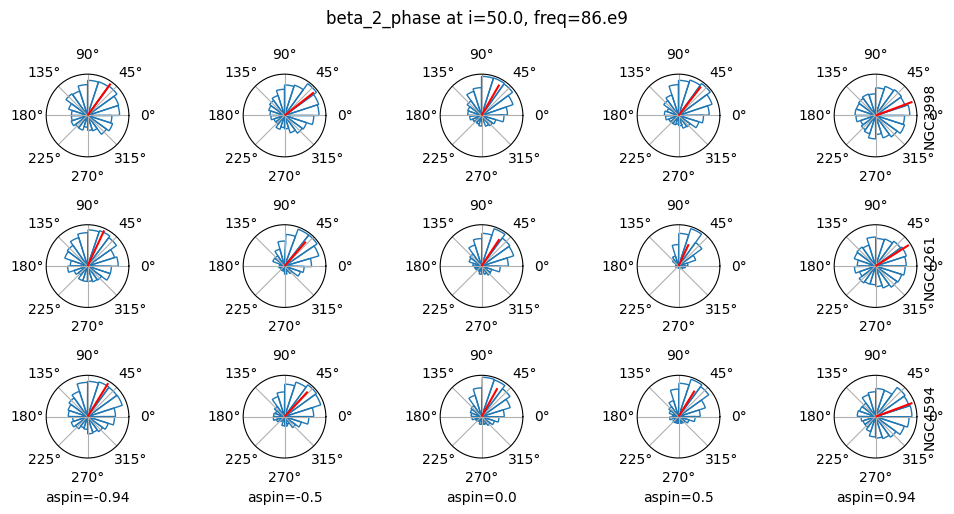

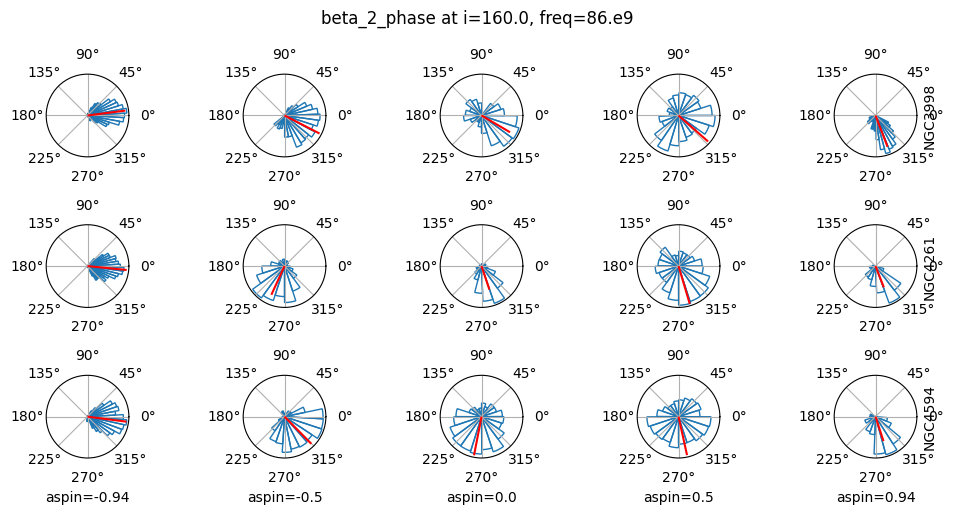

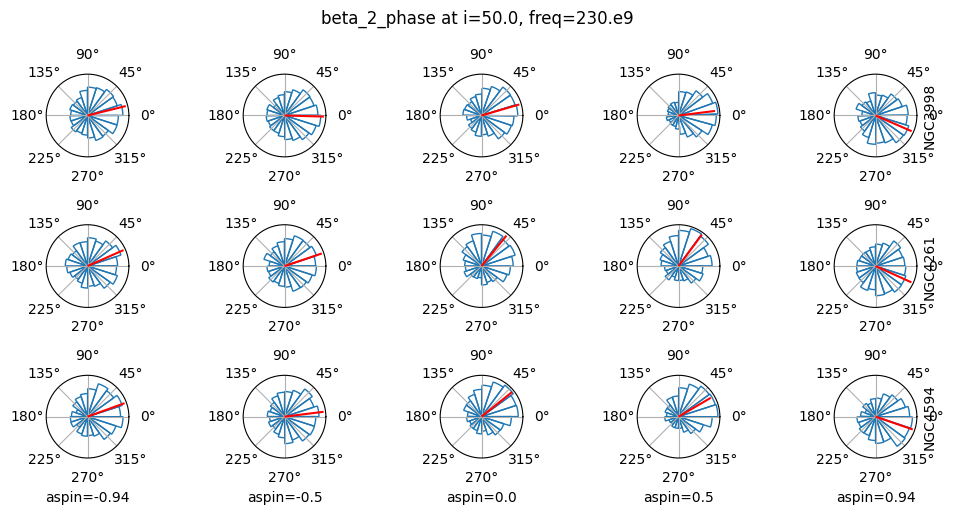

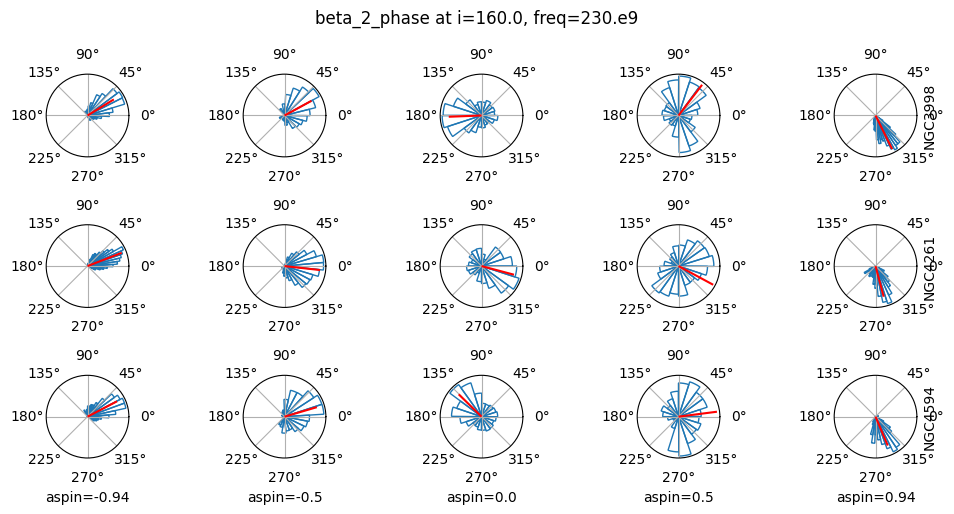

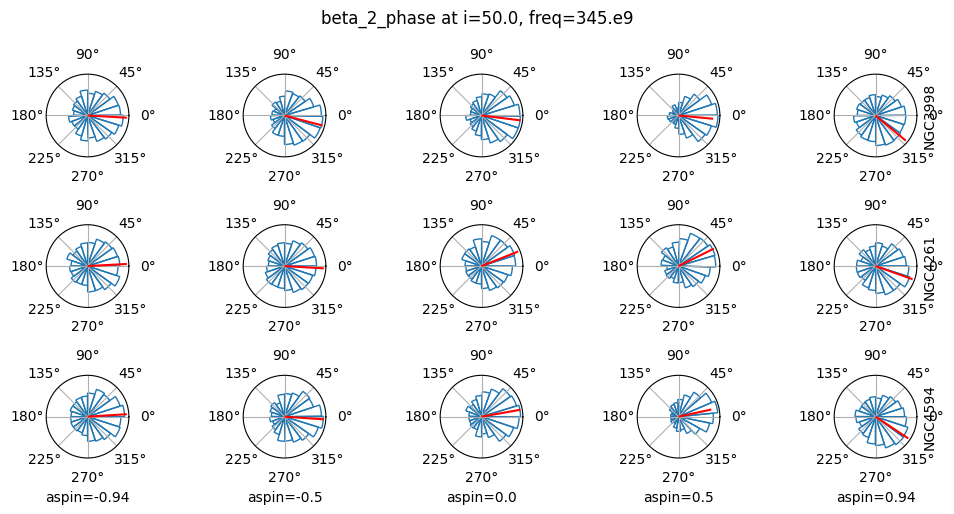

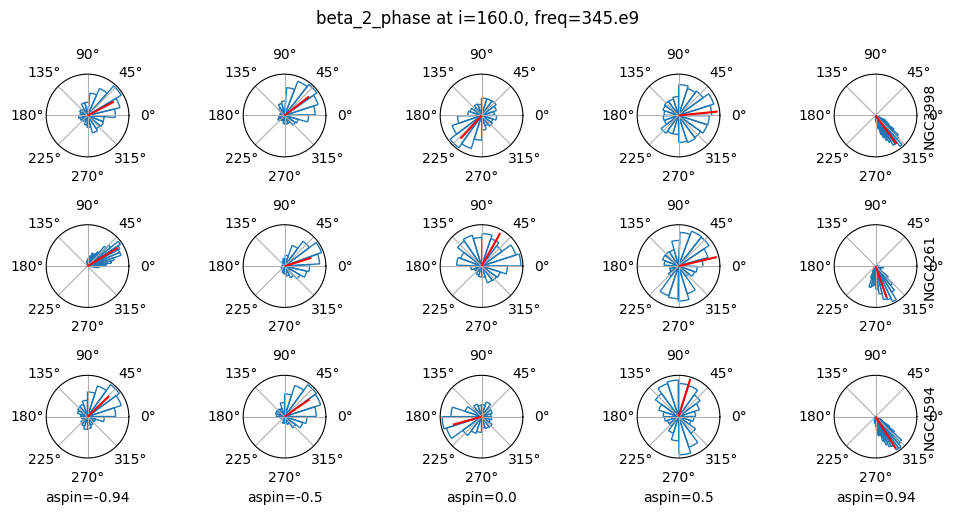

In [10]:
from scipy.stats import circmean 

def circular_hist(ax, x, bins=16, density=True, offset=0, gaps=True):
    """
    Produce a circular histogram of angles on ax.

    Parameters
    ----------
    ax : matplotlib.axes._subplots.PolarAxesSubplot
        axis instance created with subplot_kw=dict(projection='polar').

    x : array
        Angles to plot, expected in units of radians.

    bins : int, optional
        Defines the number of equal-width bins in the range. The default is 16.

    density : bool, optional
        If True plot frequency proportional to area. If False plot frequency
        proportional to radius. The default is True.

    offset : float, optional
        Sets the offset for the location of the 0 direction in units of
        radians. The default is 0.

    gaps : bool, optional
        Whether to allow gaps between bins. When gaps = False the bins are
        forced to partition the entire [-pi, pi] range. The default is True.

    Returns
    -------
    n : array or list of arrays
        The number of values in each bin.

    bins : array
        The edges of the bins.

    patches : `.BarContainer` or list of a single `.Polygon`
        Container of individual artists used to create the histogram
        or list of such containers if there are multiple input datasets.
    """
    # Wrap angles to [-pi, pi)
    x = (x+np.pi) % (2*np.pi) - np.pi

    # Force bins to partition entire circle
    if not gaps:
        bins = np.linspace(-np.pi, np.pi, num=bins+1)

    # Bin data and record counts
    n, bins = np.histogram(x, bins=bins)

    # Compute width of each bin
    widths = np.diff(bins)

    # By default plot frequency proportional to area
    if density:
        # Area to assign each bin
        area = n / x.size
        # Calculate corresponding bin radius
        radius = (area/np.pi) ** .5
    # Otherwise plot frequency proportional to radius
    else:
        radius = n

    # Plot data on ax
    patches = ax.bar(bins[:-1], radius, zorder=1, align='edge', width=widths,
                     edgecolor='C0', fill=False, linewidth=1)
    # Set the direction of the zero angle
    ax.set_theta_offset(offset)

    # Remove ylabels for area plots (they are mostly obstructive)
    if density:
        ax.set_yticks([])

    ax.vlines(circmean(x), 0, 0.2, color='r')

    return n, bins, patches

#fig.tight_layout()
for f in freq:
    for deg in inc:
        fig, axes = plt.subplots(len(NGC), len(aspin), subplot_kw={'projection': 'polar'}, figsize=(10, 5))
        fig.suptitle(f'beta_2_phase at i={deg}, freq={f}')
        fig.tight_layout()
        for i, a in enumerate(aspin):
            for j, obj in enumerate(NGC):
                ax = axes[j][i]
                if True:#for dist, settings3 in settings3.items():    
                    sel = pf(freq=f)(inc=deg)(aspin=a)(NGC=obj)
                    df = pd.read_csv(sel.iloc[0].path, sep='\t')
                    rad = np.deg2rad(df['beta_2_phase'])
                    circular_hist(ax, rad, bins=20)         
                    if i == len(aspin)-1:
                        ax_r = axes[j][i] #ax_r = axes[j][i].twinx()
                        ax_r.yaxis.set_label_position("right")       
                        ax_r.set_ylabel(obj)

                    if j == len(NGC)-1:
                        ax.set_xlabel(f'aspin={a}')
#summ1

/Users/caritsang/Desktop/Project/2024SURE/proj/postprocessing/2017_sgra_paper5/common/hallmark.py:28: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  mask |= self[k] == v
/Users/caritsang/Desktop/Project/2024SURE/proj/postprocessing/2017_sgra_paper5/common/hallmark.py:28: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  mask |= self[k] == v
/Users/caritsang/Desktop/Project/2024SURE/proj/postprocessing/2017_sgra_paper5/common/hallmark.py:28: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a

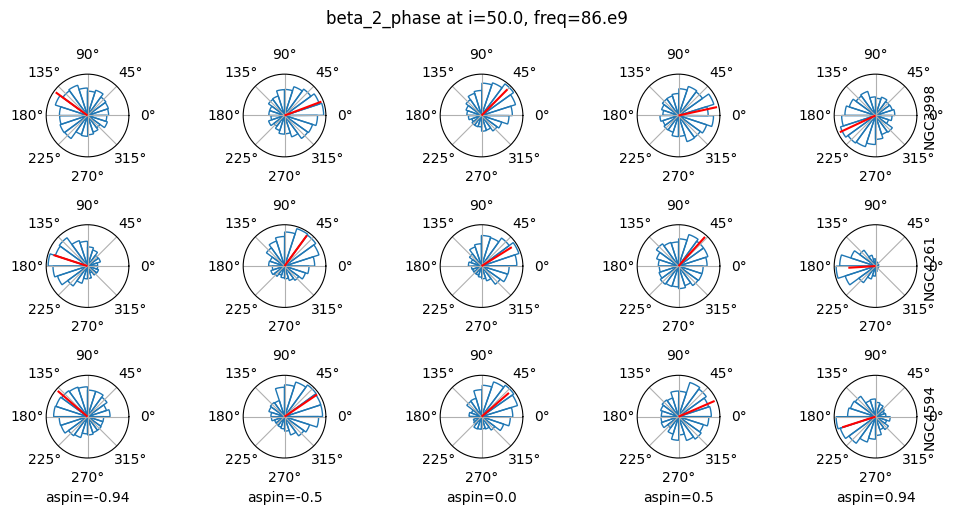

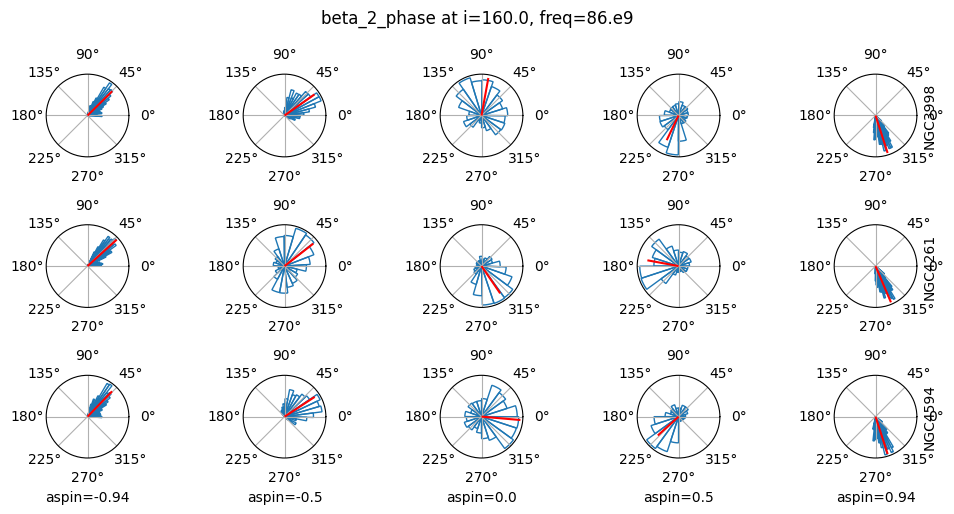

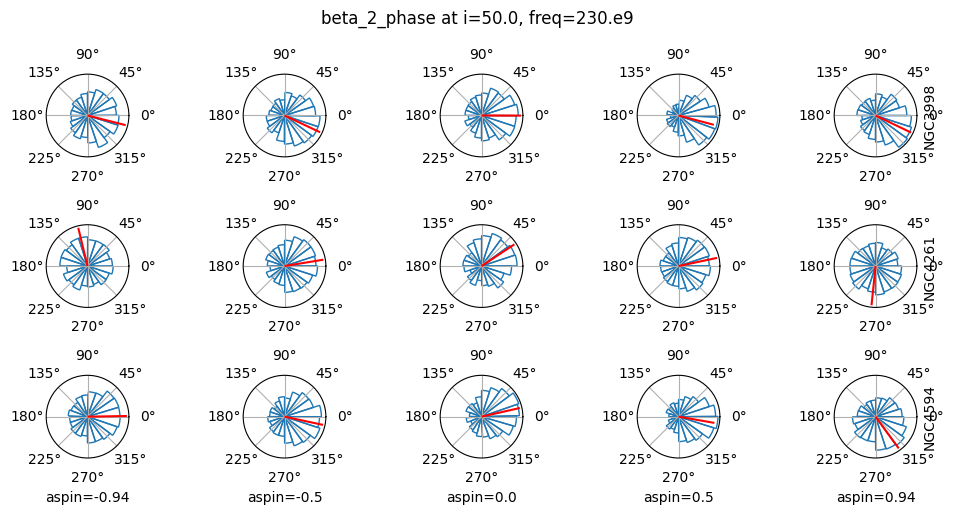

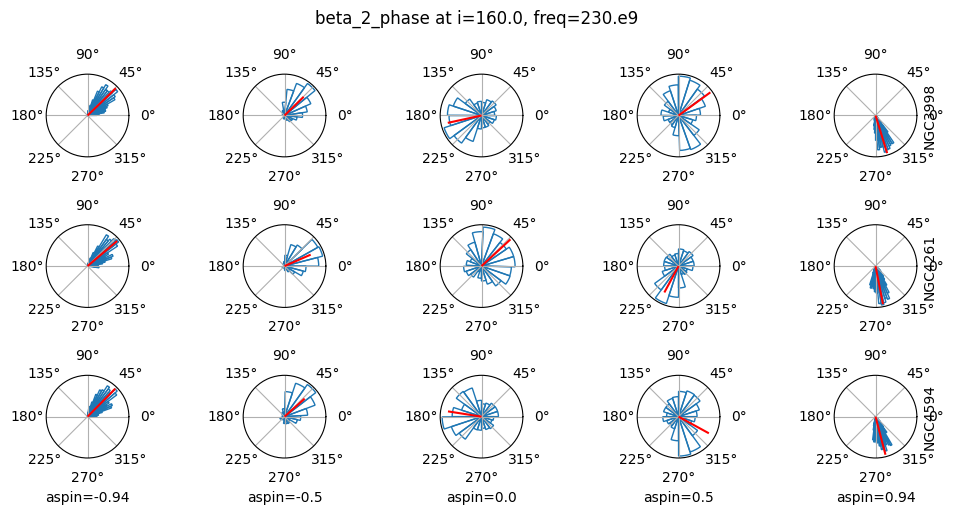

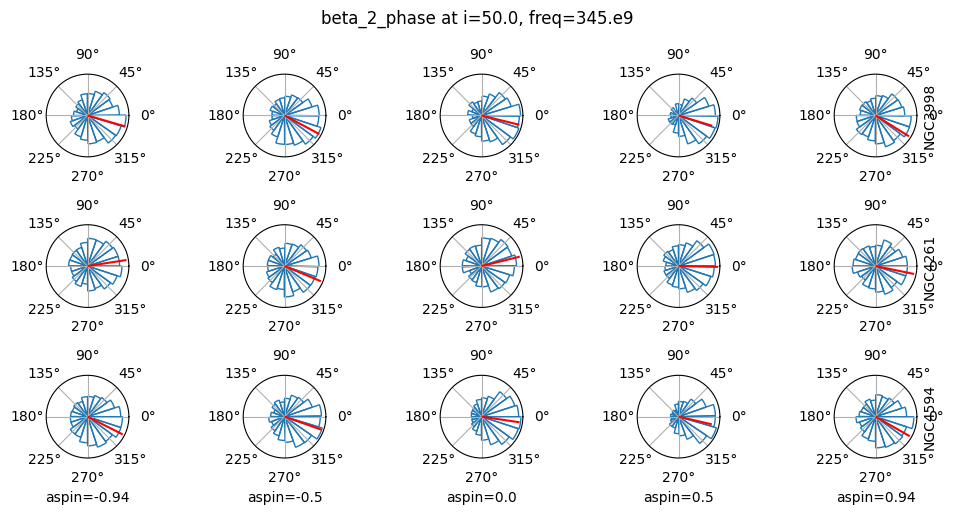

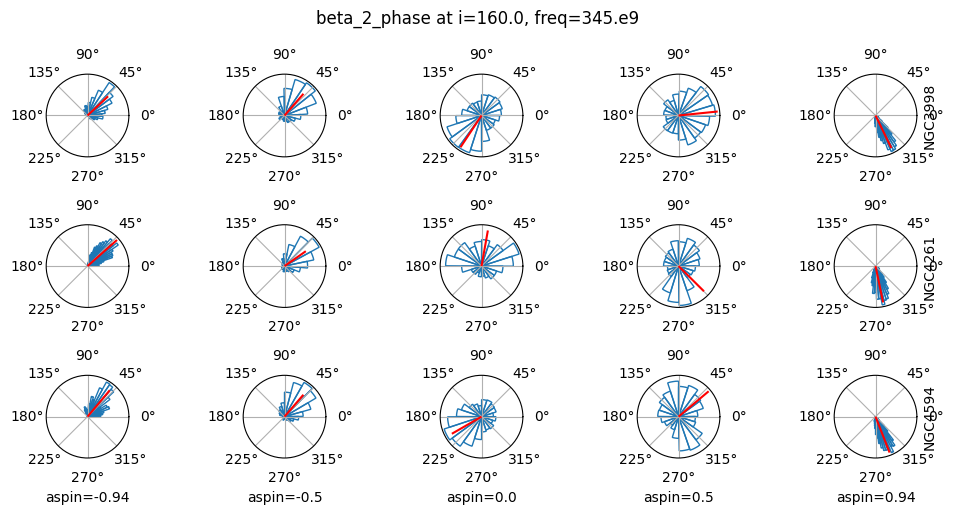

In [8]:
for f in freq:
    for deg in inc:
        fig, axes = plt.subplots(len(NGC), len(aspin), subplot_kw={'projection': 'polar'}, figsize=(10, 5))
        fig.suptitle(f'beta_2_phase at i={deg}, freq={f}')
        fig.tight_layout()
        for i, a in enumerate(aspin):
            for j, obj in enumerate(NGC):
                ax = axes[j][i]
                if True:#for dist, settings3 in settings3.items():    
                    sel = pf(freq=f)(inc=deg)(aspin=a)(NGC=obj)
                    df = pd.read_csv(sel.iloc[0].path, sep='\t')
                    rad = np.deg2rad(df['beta_2_phase'])
                    circular_hist(ax, rad, bins=20)         
                    if i == len(aspin)-1:
                        ax_r = axes[j][i] #ax_r = axes[j][i].twinx()
                        ax_r.yaxis.set_label_position("right")       
                        ax_r.set_ylabel(obj)

                    if j == len(NGC)-1:
                        ax.set_xlabel(f'aspin={a}')